**<center><h1>SEP-767: Multivariate Statistical Methods for Big Data Analysis and Process Improvement</h1></center>**
**<center><h3>Final Term Project on Fashion Clothing Dataset</h3></center>**
**<center><h4>Submitted by - Abhishek Gambhir (400546232) </h4></center>**

# **1. Introduction**

## 1.1 Problem Statement 

This notebook provides an analysis of the Fashion Clothing Database, focusing on dimensionality reduction using Principal Components Analysis (PCA) and classification of grayscale images of clothing item.

## 1.2 Significance

Precisely classifying clothing items from images is essential in applications like online retail, inventory management, and personalized recommendations. Developing a highly accurate model will improve efficiency and accuracy in clothing classification tasks, enhancing customer experience and better business outcomes for retailers and e-commerce platforms.

## 1.3 About Dataset

The dataset has grayscale images of clothing items in 28x28 pixels, with 60,000 instances for training and 10,000 for testing. Each pixel value ranges from 0 to 255, representing their lightness or darkness. The data is arranged in 785 columns/features, with the first one identifying the clothing type and the rest containing pixel values.

# **2. Import python packages and libraries**

In [60]:
#Import necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications.vgg16 import VGG16
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras import layers

from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg16 import preprocess_input

from sklearn.decomposition import PCA
import datetime
from sklearn import metrics, preprocessing

# **3. Data Loading**

In [2]:
#Training and testing file paths
train_file_path = '/Users/abhishekgambhir/Documents/SEP 740/Project/fashion-mnist_train.csv'
test_file_path = '/Users/abhishekgambhir/Documents/SEP 740/Project/fashion-mnist_test.csv'

In [3]:
#Read training and testing data from .csv files
training_data = pd.read_csv(train_file_path)
testing_data = pd.read_csv(test_file_path)

In [4]:
#For training data
training_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#For testing data
testing_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **4. Data Preprocesing**

In [6]:
#Training data shape
training_rows = training_data.shape[0]
training_cols = training_data.shape[1]

print('Rows: ', training_rows)
print('Columns: ', training_cols)

Rows:  60000
Columns:  785


In [7]:
#Testing data shape
testing_rows = testing_data.shape[0]
testing_cols = testing_data.shape[1]

print('Rows: ', testing_rows)
print('Columns: ', testing_cols)

Rows:  10000
Columns:  785


In [8]:
#Splitting input features and target labels for training data
train_images = training_data.drop(["label"],axis=1)
train_labels = training_data.label

print('Train input features shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
# train_images = np.array(train_images)
# train_labels = np.array(train_labels)

Train input features shape: (60000, 784)
Train labels shape: (60000,)


In [9]:
#Splitting input features and target labels for testing data
test_images = testing_data.drop(["label"],axis=1)
test_labels = testing_data.label

print('Test input features shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)

Test input features shape: (10000, 784)
Test labels shape: (10000,)


In [10]:
#Reshaping training and test data
train_images_reshaped = train_images.values.reshape(-1, 28,28,1)
test_images_reshaped = test_images.values.reshape(-1,28,28,1)

In [11]:
#Shape for training and testing features and labels after reshaping

print('After reshaping -')
print('Train features shape: ', train_images_reshaped.shape)
print('Train labels shape: ', train_labels.shape)
print('Test features shape: ', test_images_reshaped.shape)
print('Test labels shape: ', test_labels.shape)

After reshaping -
Train features shape:  (60000, 28, 28, 1)
Train labels shape:  (60000,)
Test features shape:  (10000, 28, 28, 1)
Test labels shape:  (10000,)


In [12]:
#Split data into train and test dataset (already split but assinging to meaningful convention)
x_train, y_train, x_test, y_test = train_images_reshaped, train_labels, test_images_reshaped, test_labels

In [13]:
#Convert images into 3 channels i.e. RGB
x_train = np.dstack([x_train] * 3)
x_test = np.dstack([x_test] * 3)

print('x_train new shape: ', x_train.shape)
print('x_test new shape: ', x_test.shape)

x_train new shape:  (60000, 28, 84, 1)
x_test new shape:  (10000, 28, 84, 1)


In [14]:
#Reshape image as per the tensor format required by tensorflow
x_train = x_train.reshape(-1,28,28,3)
x_test = x_test.reshape(-1,28,28,3)

print('x_train new shape: ', x_train.shape)
print('x_test new shape: ', x_test.shape)

x_train new shape:  (60000, 28, 28, 3)
x_test new shape:  (10000, 28, 28, 3)


In [15]:
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])

print('x_train new shape: ', x_train.shape)
print('x_test new shape: ', x_test.shape)

x_train new shape:  (60000, 48, 48, 3)
x_test new shape:  (10000, 48, 48, 3)


In [16]:
#Scale pixel values b/w 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
#One-hot encode y values for neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot  = to_categorical(y_test)

print('Train target shape: ', y_train_one_hot.shape)
print('Test target shape: ', y_test_one_hot.shape)

Train target shape:  (60000, 10)
Test target shape:  (10000, 10)


In [18]:
#Summary of default VGG16 model
VGG_model = VGG16(weights='imagenet')

VGG_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#Summary of custom VGG16 model
input_layer = layers.Input(shape=(48,48,3))
vgg16_model =VGG16(weights='imagenet', input_tensor=input_layer, include_top=False)
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#VGG16 custom Last layer 

last_layer = vgg16_model.output

flatten = layers.Flatten()(last_layer)

dense1 = layers.Dense(100, activation='relu')(flatten)
dense1 = layers.Dense(100, activation='relu')(flatten)
dense1 = layers.Dense(100, activation='relu')(flatten)

output_layer = layers.Dense(10, activation='softmax')(flatten)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 14,719,818 (56.15 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#Make all layers intrainable except the last 

for layer in model.layers[:-1]:
    layer.trainable=False

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 5,130 (20.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
#Extract features using VGG imagenet weights

#Train features
train_feature_extractor = model.predict(x_train)
train_features = train_feature_extractor.reshape(train_feature_extractor.shape[0], -1)

#Test features
test_feature_extractor = model.predict(x_test)
test_features = test_feature_extractor.reshape(test_feature_extractor.shape[0], -1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 108ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step


In [37]:
#Shape of the train and test features extracted using VGG16 model

print('Train feature shape:', train_features.shape)
print('Test feature shape:', test_features.shape)

Train feature shape: (60000, 10)
Test feature shape: (10000, 10)


Text(0, 0.5, 'Cum variance')

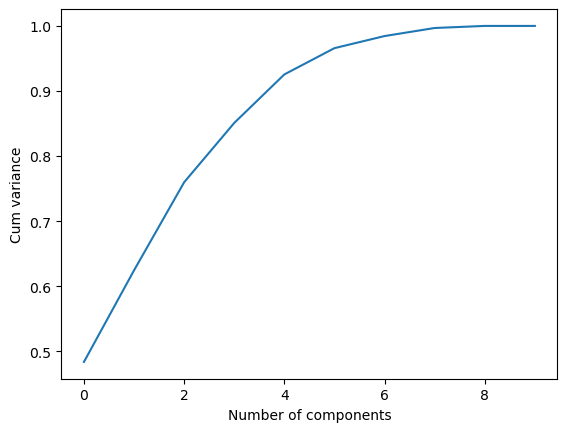

In [42]:
#Dimension reduction using PCA 

pca_test = PCA(n_components=10)
pca_test.fit(train_features)

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cum variance')

In [70]:
n_PCA_components = 9
pca = PCA(n_components=n_PCA_components)
train_PCA = pca.fit_transform(train_features)
test_PCA = pca.transform(test_features)

In [71]:
model = Sequential()
inputs = layers.Input(shape=(n_PCA_components,))
hidden =  layers.Dense(256, activation='relu')(inputs)
output = layers.Dense(10, activation='softmax')(hidden)
model = Model(inputs=inputs, outputs=output)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,130 (20.04 KB)

 Trainable params: 5,130 (20.04 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

In [73]:
start = datetime.datetime.now()

model.fit(train_PCA, y_train_one_hot, epochs=20, verbose=1)

end = datetime.datetime.now()

print('Total execution time: ', end-start)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - categorical_accuracy: 0.4318 - loss: 1.8060
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step - categorical_accuracy: 0.5675 - loss: 1.2067
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step - categorical_accuracy: 0.5987 - loss: 1.1250
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - categorical_accuracy: 0.6061 - loss: 1.0902
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - categorical_accuracy: 0.6196 - loss: 1.0623
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - categorical_accuracy: 0.6236 - loss: 1.0525
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step - categorical_accuracy: 0.6293 - loss: 1.0339
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step - categorical_accuracy: 0.6379 - loss: 1.0152
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - categorical_accuracy: 0.6380 - loss: 1.0163
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step - categorical_accuracy: 0

In [74]:
labels_y = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

train_label_encoded = y_train
test_label_encoded = y_test

le = preprocessing.LabelEncoder()
le.fit(train_labels)

predict_test = model.predict(test_PCA)
predict_test = np.argmax(predict_test, axis=1)

print('Accuracy: ', metrics.accuracy_score(y_test, predict_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step
Accuracy:  0.6652
